In [1]:
import numpy as np
#from numpy.random import randint as rnd
import matplotlib.pyplot as plt
from numpy.random import uniform

def all_args_max(arr):
    return np.where(arr >= np.max(arr))

In [2]:
BigCity = 10000
NSmallCities = 50
SizeSmallCity = BigCity / NSmallCities
n_good = 200
Iterations = 10000

In [3]:
class Country():
    def __init__(self, size_big = BigCity, 
                 size_small = SizeSmallCity, n_small = NSmallCities):
        
        self.size_big = size_big
        self.size_small = size_small
        self.n_small = n_small
        
        self.n_cities = n_small + 1
        self.pop = self.size_big + self.size_small*self.n_small
        
        self.cities_totals = np.zeros(self.n_cities)
        
        # keep track of number of times given city places 1 in a given iteration
        self.top_finishes = np.zeros(self.n_cities)
        
        # Cities sizes
        self.cities_pops = np.full((self.n_small+1), self.size_small)
        # First city is the big one:
        self.cities_pops[0] = self.size_big
        
        self.scores = np.zeros(self.n_cities)
    
    def addSmartOne(self, ind, verbose = False):
        if ind < self.size_big:
            city_ind = 0
        else:
            city_ind = int(np.floor((ind-self.size_big)/self.size_small))+1
        
        self.cities_totals[city_ind] += 1
        if verbose:
            print(f"ind = {ind}, city_ind = {city_ind}")
        
    
    def print(self):
        print(f"Big/Small = {self.size_big/self.size_small}")
        print(f"Total population = {self.pop}")       
        print(f"Populations:\t{self.cities_pops}")
        print(f"Scores:\t\t{self.scores}")
        self.printTopFinishes()
    
    
    def printTopFinishes(self):
        print(f"Totals:\t\t{self.cities_totals}")
        print(int(self.pop))
        means = [self.top_finishes[i]/self.cities_pops[i] for i in range(int(self.n_cities))]
        #print(f"Standing:\t{self.top_finishes}")
        print(f"Standing:\t{means}")

        
    def computeTopFinishes(self):
        for city_ind in range(self.n_cities):
            p = self.cities_pops[city_ind]
            s = self.cities_totals[city_ind]
            s_bar = s/n_good
            mu =  p/self.pop
            #print(f's_bar = {s_bar}, mu = {mu}')
            self.scores[city_ind] = np.sqrt(n_good)*(s_bar-mu)/p
            
            
        self.top_finishes[all_args_max(self.scores)] += 1
        self.cities_totals = np.zeros(self.n_cities)
        self.scores = np.zeros(self.n_cities)
        
    def rnd(self):
        return int(np.floor(uniform()*self.pop))

In [4]:
def oneIteration(country, tries = n_good, verbose = False):
    for i in range(tries):
        #ind = rnd(1, country.pop)
        ind = country.rnd()
        country.addSmartOne(ind)
    if verbose:
        country.print()
        print()
    country.computeTopFinishes()

Totals:		[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
20000
Standing:	[0.0, 1.84, 1.875, 2.0, 1.795, 1.62, 1.825, 1.815, 1.715, 1.79, 1.685, 1.795, 1.88, 1.76, 1.705, 1.71, 1.77, 1.91, 1.735, 1.9, 1.815, 2.01, 1.83, 1.83, 1.91, 1.79, 1.81, 1.775, 1.775, 1.89, 1.825, 1.72, 1.81, 1.755, 1.715, 1.84, 1.93, 1.785, 1.84, 1.74, 1.875, 1.69, 1.775, 1.975, 1.94, 1.85, 1.725, 2.005, 1.835, 1.905, 1.855]
Top Cities = (array([21]),)
[  0. 368. 375. 400. 359. 324. 365. 363. 343. 358. 337. 359. 376. 352.
 341. 342. 354. 382. 347. 380. 363. 402. 366. 366. 382. 358. 362. 355.
 355. 378. 365. 344. 362. 351. 343. 368. 386. 357. 368. 348. 375. 338.
 355. 395. 388. 370. 345. 401. 367. 381. 371.]


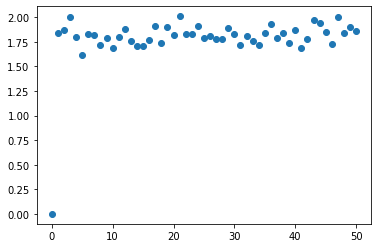

In [5]:
c1 = Country()

for j in range(Iterations):
    oneIteration(c1, verbose=False)
    
c1.printTopFinishes()
print(f"Top Cities = {all_args_max(c1.top_finishes)}")
print(c1.top_finishes)
means = [c1.top_finishes[i]/c1.cities_pops[i] for i in range(int(c1.n_cities))]
plt.scatter(x = range(len(c1.top_finishes)), y = means)
plt.savefig('topFinishes.png')